In [47]:
import numpy as np

# Import Qiskit
from qiskit import QuantumCircuit
from qiskit import Aer, transpile
from qiskit.tools.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi
import numpy as np

In [48]:
from qiskit import transpile
from qiskit.quantum_info import Kraus, SuperOp
from qiskit.providers.aer import AerSimulator

In [49]:
pi=np.pi

In [50]:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

In [51]:
simulator = Aer.get_backend('aer_simulator')

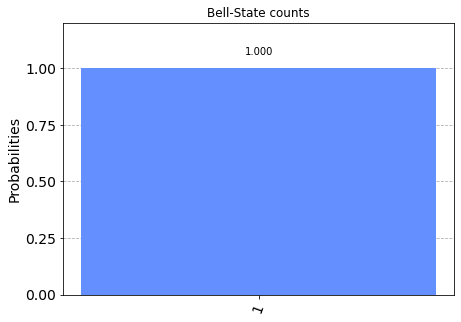

In [73]:
# Create circuit
circ1 = QuantumCircuit(1)
circ1.ry(pi,0)
circ1.measure_all()

# Transpile for simulator
simulator = Aer.get_backend('aer_simulator')
circ1 = transpile(circ1, simulator)

# Run and get counts
result = simulator.run(circ1).result()
counts = result.get_counts(circ1)
plot_histogram(counts, title='Bell-State counts')


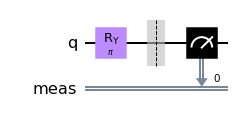

In [53]:
circ.draw(output='mpl')

In [57]:
result = simulator.run(circ, shots=10, memory=True).result()
memory = result.get_memory(circ)
print(memory)

['1', '1', '1', '1', '1', '1', '1', '1', '1', '1']


In [58]:
# Import from Qiskit Aer noise module
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise import QuantumError, ReadoutError
from qiskit.providers.aer.noise import pauli_error
from qiskit.providers.aer.noise import depolarizing_error
from qiskit.providers.aer.noise import thermal_relaxation_error

In [222]:
# Create an empty noise model
noise_depolarizing = NoiseModel()

# Add depolarizing error to all single qubit u1, u2, u3 gates
error = depolarizing_error(0.1, 1)
noise_depolarizing.add_all_qubit_quantum_error(error, ['u1', 'u2', 'u3'])
# Create noisy simulator backend
sim_noise = AerSimulator(noise_model=noise_depolarizing)
# Print noise model info
print(noise_depolarizing)

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'u1', 'u2', 'u3']
  Instructions with noise: ['u2', 'u1', 'u3']
  All-qubits errors: ['u1', 'u2', 'u3']


In [217]:
# Create circuit
circ2= QuantumCircuit(1)
circ2.ry(35*pi/36,0)
circ2.measure_all()
circ2.draw()

┌────────────┐ ░ ┌─┐
   q_0: ┤ Ry(3.0543) ├─░─┤M├
        └────────────┘ ░ └╥┘
meas: 1/══════════════════╩═
                          0

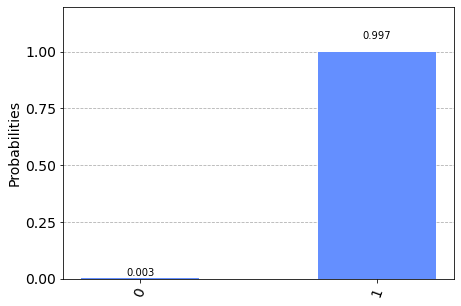

In [218]:
sim_ideal = AerSimulator()
result_ideal = sim_ideal.run(circ2).result()
plot_histogram(result_ideal.get_counts(0))

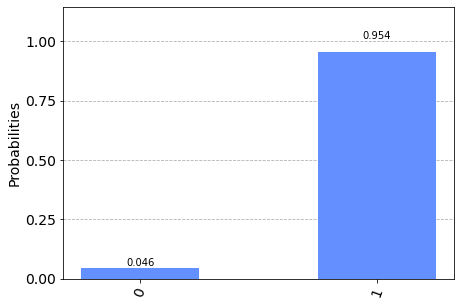

In [223]:
# Transpile circuit for noisy basis gates
circ2_tnoise = transpile(circ2, sim_noise)

# Run and get counts
result_noise2 = sim_noise.run(circ2_tnoise).result()
counts_noise2 = result_noise2.get_counts(0)

# Plot noisy output
plot_histogram(counts_noise2)


In [164]:
# Create circuit
circ1 = QuantumCircuit(1)
circ1.ry(pi,0)
circ1.id(0)
circ1.measure_all()

In [165]:
circ1.draw()

┌───────┐┌───┐ ░ ┌─┐
   q_0: ┤ Ry(π) ├┤ I ├─░─┤M├
        └───────┘└───┘ ░ └╥┘
meas: 1/══════════════════╩═
                          0

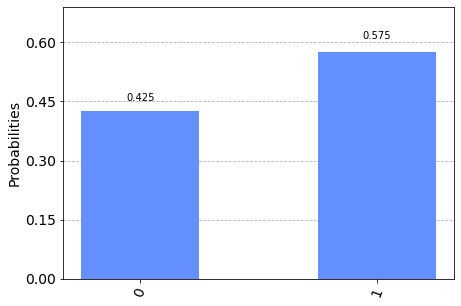

In [213]:
# Transpile circuit for noisy basis gates
circ1_tnoise = transpile(circ1, sim_noise)

# Run and get counts
result_noise1 = sim_noise.run(circ1_tnoise).result()
counts_noise1 = result_noise1.get_counts(0)

# Plot noisy output
plot_histogram(counts_noise1)

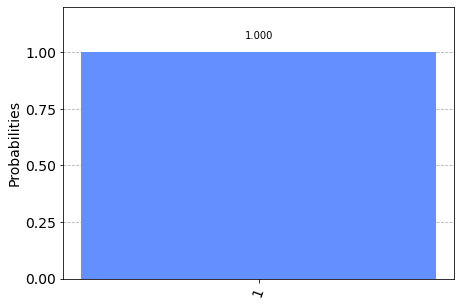

In [148]:
# Create circuit
circ3= QuantumCircuit(1)
circ3.ry(pi,0)
circ3.measure_all()
sim_ideal = AerSimulator()
result_ideal = sim_ideal.run(circ3).result()
plot_histogram(result_ideal.get_counts(0))

In [149]:
circ3.draw()

┌───────┐ ░ ┌─┐
   q_0: ┤ Ry(π) ├─░─┤M├
        └───────┘ ░ └╥┘
meas: 1/═════════════╩═
                     0

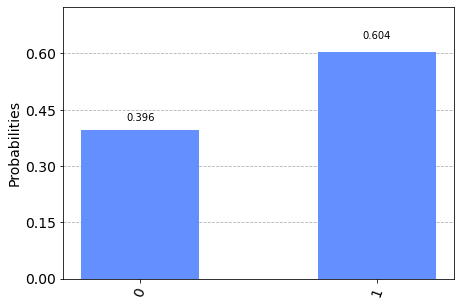

In [183]:
# Transpile circuit for noisy basis gates
circ3_tnoise = transpile(circ3, sim_noise)

# Run and get counts
result_noise3 = sim_noise.run(circ3_tnoise).result()
counts_noise3 = result_noise3.get_counts(0)

# Plot noisy output
plot_histogram(counts_noise3)

In [ ]:
m=10
p=0.9
